In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from rdkit import DataStructs
from rdkit.Chem import rdMolDescriptors
import numpy as np
from rdkit.Chem import rdChemReactions
from rdkit.Chem import AllChem
import mols2grid
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

In [4]:
# Example with the Buchwald Dataset.

# Load in the dataset.
path = 'data/cleaned_datasets/buchwald.csv'
df = pd.read_csv(path, index_col=0)
df = df.reset_index(drop=True)

In [5]:
# Generating the halide and nucleophiles.
hal = [Chem.MolFromSmiles(x) for x in df['halide'].unique()]
nuc = [Chem.MolFromSmiles(x) for x in df['nuc'].unique()]

In [6]:
# Visualizing the similarities.
hal_fps = [rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, 2, 2048) for mol in hal]
nuc_fps = [rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, 2, 2048) for mol in nuc]

hal_tanimoto_square = np.empty((len(hal_fps), len(hal_fps)))
nuc_tanimoto_square = np.empty((len(nuc_fps), len(nuc_fps)))

for i in range(len(hal_fps)):
    hal_tanimoto_square[i] = np.array(DataStructs.BulkTanimotoSimilarity(hal_fps[i], hal_fps))

for i in range(len(nuc_fps)):
    nuc_tanimoto_square[i] = np.array(DataStructs.BulkTanimotoSimilarity(nuc_fps[i], nuc_fps))

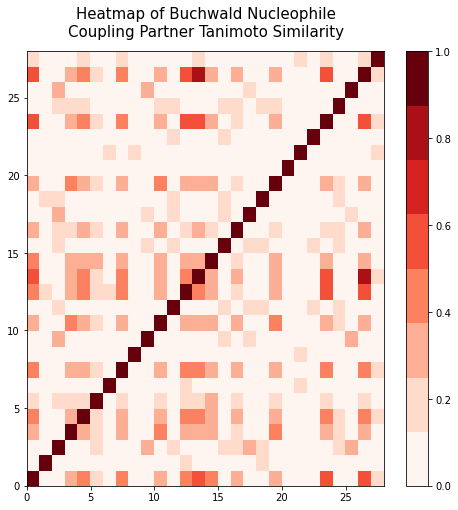

In [7]:
# Plotting the Nucleophile square.
    
fig,ax = plt.subplots(figsize=(8,8))
psm = ax.pcolormesh(nuc_tanimoto_square, cmap=plt.cm.get_cmap('Reds', 8))
fig.colorbar(psm, ax=ax)
plt.title(r'Heatmap of Buchwald Nucleophile' '\n' r'Coupling Partner Tanimoto Similarity', size=15, loc='center', pad=15)
plt.show()

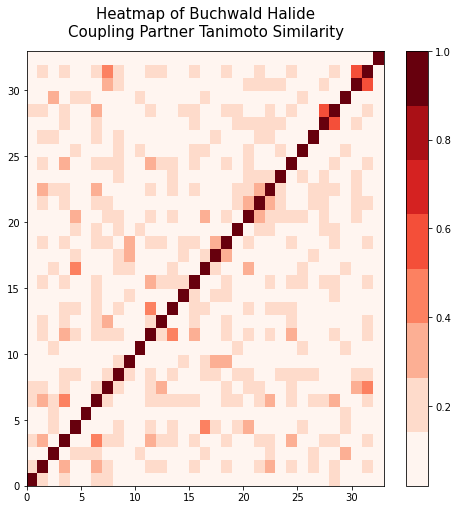

In [8]:
# Plotting the Halide square.

fig,ax = plt.subplots(figsize=(8,8))
psm = ax.pcolormesh(hal_tanimoto_square, cmap=plt.cm.get_cmap('Reds', 8))
fig.colorbar(psm, ax=ax)
plt.title(r'Heatmap of Buchwald Halide' '\n' r'Coupling Partner Tanimoto Similarity', size=15, loc='center', pad=15)
plt.show()